In [1]:
import numpy as np;
%matplotlib inline
import matplotlib.pyplot as plt

SMALL_SIZE = 13
MEDIUM_SIZE = SMALL_SIZE
BIGGER_SIZE = SMALL_SIZE

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
from qiskit import *

In [3]:
def phase_oracle(circuit, q):
    circuit.h(q[2])
    circuit.ccx(q[0], q[1], q[2])
    circuit.h(q[2])

In [4]:
def diffuser(circuit, q):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for nq in range(nqubits):
        circuit.h(q[nq])
        circuit.x(q[nq])
    
    # Do controlled-Z
    circuit.h(q[2])
    circuit.ccx(q[0], q[1], q[2])
    circuit.h(q[2])
    
    for nq in range(nqubits):
        circuit.x(q[nq])
        circuit.h(q[nq])

In [5]:
n = 3
barriers = True

q = QuantumRegister(n)
grover_circuit = QuantumCircuit(q)

for qubit in range(n):
    grover_circuit.h(q[qubit])

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit, q)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit, q)

#grover_circuit.barrier()
grover_circuit.draw()

In [6]:
c = ClassicalRegister(n)
grover_circuit += QuantumCircuit(c)

In [7]:
grover_circuit.measure(q,c,basis='Ensemble',add_param='Z')
backend = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {}
options1 = {
    "thermal_factor": 0.,
    "decoherence_factor": .9,
    "depolarization_factor": 0.99,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
    "tsp_model_error": [1., 0.],
    "plot": False
}
# Execution with and without noise
run = execute(grover_circuit,backend,**options)
result = run.result()
run_error = execute(grover_circuit,backend,**options1)
##fix 
##<<<START>>>
result_error = run_error.result()
##<<<END>>>
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob1 = result_error['results'][0]['data']['ensemble_probability']

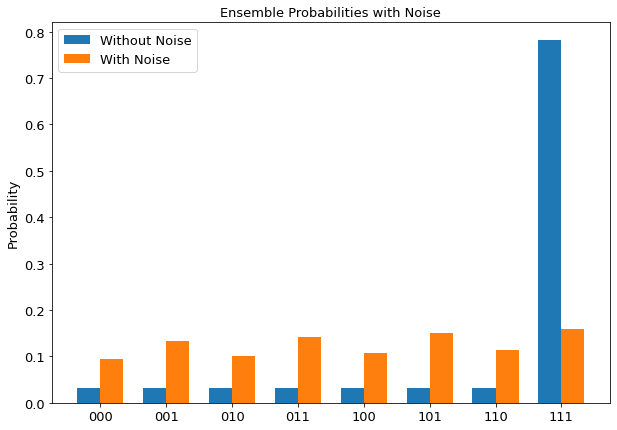

In [8]:
labels = prob1.keys()
without_noise = prob.values()
with_noise = prob1.values()

x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities with Noise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()